# Image Classification with TensorFlow
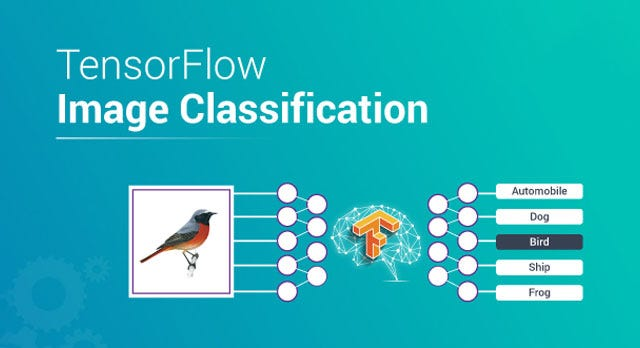

Based on Codecademy course: Deep Learning with TensorFlow: Image Classification

**Goal:** Accuracy in the Classification of Pneumonia vs. Healthy Respiratory X-rays

## Preprocessing the Dataset
Data obtained from Kaggle: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/ 

**IMPORTANT**: THE DIRECTORY IN WHICH THE TRAINING AND TESTING DATA IMAGES ARE IN ARE SPECIALIZED IN THIS TUTORIAL. I CREATED A NEW FOLDER AFTER EXTRACTING THE DATASET'S ZIP FOLDER CALLED "Main_Directory" AT WHICH POINT I MOVED THE FOLDERS "test" and "train" WITHIN "<archive (1)/chest_xray>" TO

In [20]:
# Import TensorFlow
import tensorflow as tf 
# Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator


The dataset is loaded from our filepath using ImageDataGenerator

The parameters within the ImageDataGenerator constructor allow for data augmentation, randomly shifting through our training dataset each iteration

In [21]:
#Creates an ImageDataGenerator:
training_data_generator = ImageDataGenerator(rescale = 1.0/255, zoom_range = 0.2, rotation_range = 15, width_shift_range = 0.05, height_shift_range = 0.05)

my_augmented_image_data_generator = ImageDataGenerator( vertical_flip = True )

#Prints its attributes:
print(training_data_generator.__dict__)

{'featurewise_center': False, 'samplewise_center': False, 'featurewise_std_normalization': False, 'samplewise_std_normalization': False, 'zca_whitening': False, 'zca_epsilon': 1e-06, 'rotation_range': 15, 'width_shift_range': 0.05, 'height_shift_range': 0.05, 'shear_range': 0.0, 'zoom_range': [0.8, 1.2], 'channel_shift_range': 0.0, 'fill_mode': 'nearest', 'cval': 0.0, 'horizontal_flip': False, 'vertical_flip': False, 'rescale': 0.00392156862745098, 'preprocessing_function': None, 'dtype': 'float32', 'interpolation_order': 1, 'data_format': 'channels_last', 'channel_axis': 3, 'row_axis': 1, 'col_axis': 2, '_validation_split': 0.0, 'mean': None, 'std': None, 'zca_whitening_matrix': None, 'brightness_range': None}


In [22]:
model = tf.keras.Sequential()

#Add an input layer that will expect grayscale input images of size 256x256:
model.add(tf.keras.Input(shape=(256,256,1)))

#Use a Flatten() layer to flatten the image into a single vector:
model.add(tf.keras.layers.Flatten())

#model.add(...)

model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(50,activation="relu"))
model.add(tf.keras.layers.Dense(2,activation="softmax"))

#Print model information:
model.summary() 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 65536)             0         
                                                                 
 dense_7 (Dense)             (None, 100)               6553700   
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 2)                 102       
                                                                 
Total params: 6558852 (25.02 MB)
Trainable params: 6558852 (25.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Previously, in our feed-forward model above, we multiplied our normalized pixels by a large weight matrix (of shape (65536, 100)) to generate our next set of features.

However, when we use a convolutional layer, we learn a set of smaller weight tensors, called filters (also known as kernels). We move each of these filters (i.e. convolve them) across the height and width of our input, to generate a new “image” of features. Each new “pixel” results from applying the filter to that location in the original image.

## Convultional Neural Networks

### Defining A Number of Filters

In [23]:
print("\n\nModel with 8 filters:")

model = tf.keras.Sequential()
# Note below, (shape=(256, 256, 1)) represents that the images to be classified are 256 pixels by 256 pixels, and are grayscale 
model.add(tf.keras.Input(shape=(256, 256, 1)))

#Adds a Conv2D layer with 8 filters, each size 3x3:
model.add(tf.keras.layers.Conv2D(16, 7,activation="relu"))
model.summary()



Model with 8 filters:
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 250, 250, 16)      800       
                                                                 
Total params: 800 (3.12 KB)
Trainable params: 800 (3.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Stride and Padding

The stride hyperparameter represents how far we move each filter after we've applied it, a stride of 1 focuses on 1 pixel at a time, a larger stride filters multiple pixels at the same time

The padding hyperparameter defines what we do once our filter gets to the end of a row/column. In other words: “what happens when we run out of image?”

In [24]:
print("Model with 16 filters:")

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))

#Adds a Conv2D layer with 16 filters, each size 7x7, and uses a stride of 1 with same padding:
model.add(tf.keras.layers.Conv2D(16, 7,
strides=1,
padding="same",
activation="relu"))

model.summary()

Model with 16 filters:
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 256, 256, 16)      800       
                                                                 
Total params: 800 (3.12 KB)
Trainable params: 800 (3.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Note the output shape is same as the input image.

**IMPORTANT**: Specifying “same” padding told this layer to add 3 zeros of padding around the image. As a result, we can apply the 7x7 filter to every pixel, even those on the edge of the image.

## Stacking Convolutional Layers

The beauty of neural networks is that we can stack many layers to learn richer combinations of features, with different filters of various sizes, strides, and padding choices

In [25]:
model = tf.keras.Sequential()


model.add(tf.keras.Input(shape=(256,256,1)))

#Add a Conv2D layer
# - with 2 filters of size 5x5
# - strides of 3
# - valid padding
model.add(tf.keras.layers.Conv2D(2, 5, strides=3, padding = 'valid', activation="relu"))

#Add a Conv2D layer
# - with 4 filters of size 3x3
# - strides of 1
# - valid padding
model.add(tf.keras.layers.Conv2D(4, 3, strides=1, padding = 'valid', activation="relu"))

model.add(tf.keras.layers.Flatten())


model.add(tf.keras.layers.Dense(2,activation="softmax"))

#Print model information:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 84, 84, 2)         52        
                                                                 
 conv2d_13 (Conv2D)          (None, 82, 82, 4)         76        
                                                                 
 flatten_6 (Flatten)         (None, 26896)             0         
                                                                 
 dense_10 (Dense)            (None, 2)                 53794     
                                                                 
Total params: 53922 (210.63 KB)
Trainable params: 53922 (210.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Pooling

- Like in convolution, we move windows of specified size across our input. We can specify the stride and padding in a max pooling layer.
- However, instead of multiplying each image patch by a filter, we replace the patch with its maximum value.

Even if we move around objects in the input image, the output will be the same. This is very useful for classification. *For example,* we usually want to classify an image of a cat as a cat, regardless of how the cat is oriented in the image.

In [26]:
model = tf.keras.Sequential()


model.add(tf.keras.Input(shape=(256,256,1)))

model.add(tf.keras.layers.Conv2D(2,5,strides=3,padding="valid",activation="relu"))

#Add first max pooling layer here.
model.add(tf.keras.layers.MaxPooling2D(pool_size = (5,5),strides=(5,5)))

model.add(tf.keras.layers.Conv2D(4,3,strides=1,padding="valid",activation="relu"))

#Add the second max pooling layer here.
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(2,activation="softmax"))

#Print model information:
model.summary() 

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 84, 84, 2)         52        
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 2)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 4)         76        
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 4)           0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 196)               0         
                                                                 
 dense_11 (Dense)            (None, 2)               

The parameters have dropped to 522!

# Train the Model

**NOTE**: In this exercise, we train and test the model using hundreds of image files. As a result, the execution time will be longer than what is typical — please allow a few minutes for the program to run.

In [27]:
BATCH_SIZE = 16

print("\nLoading training data...")

training_data_generator = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        rotation_range=15,
        width_shift_range=0.05,
        height_shift_range=0.05)

training_iterator = training_data_generator.flow_from_directory('Main_Directory/train', class_mode='categorical',color_mode='grayscale',batch_size=BATCH_SIZE)


print("\nLoading validation data...")

#1) Create validation_data_generator, an ImageDataGenerator that just performs pixel normalization:

validation_data_generator = ImageDataGenerator(rescale=1.0/255)

#2) Use validation_data_generator.flow_from_directory(...) to load the validation data from the 'data/test' folder:

validation_iterator = validation_data_generator.flow_from_directory('Main_Directory/test', class_mode='categorical', color_mode='grayscale', batch_size=BATCH_SIZE)


print("\nBuilding model...")

#Rebuilds our model from the previous exercise, with convolutional and max pooling layers:

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))
model.add(tf.keras.layers.Conv2D(2, 5, strides=3, activation="relu")) 
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(5, 5), strides=(5,5)))
model.add(tf.keras.layers.Conv2D(4, 3, strides=1, activation="relu")) 
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(2,activation="softmax"))

model.summary()


print("\nCompiling model...")

#3) Compile the model with an Adam optimizer, Categorical Cross Entropy Loss, and Accuracy and AUC metrics:

model.compile(
   optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
   loss=tf.keras.losses.CategoricalCrossentropy(),
   metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()]
)

print("\nTraining model...")

#4) Use model.fit(...) to train and validate our model for 5 epochs:

history = model.fit(
       training_iterator,
       steps_per_epoch=training_iterator.samples/BATCH_SIZE,
       epochs=5,
       validation_data=validation_iterator,
       validation_steps=validation_iterator.samples/BATCH_SIZE
)


Loading training data...
Found 5216 images belonging to 2 classes.

Loading validation data...
Found 624 images belonging to 2 classes.

Building model...
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 84, 84, 2)         52        
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 2)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 4)         76        
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 4)           0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         

#### **Validation accuracy is the accuracy of a model on new data, while training accuracy is the accuracy of a model on the data it was trained on.**

## Let's Make a Graph!


Training model...


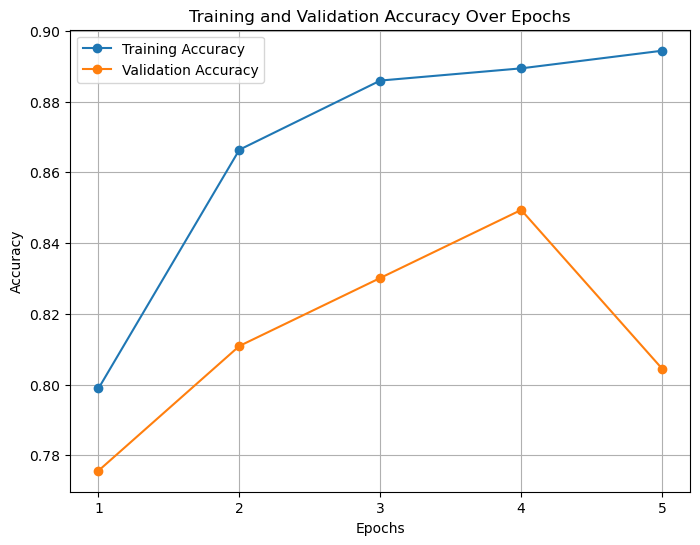

In [31]:
import matplotlib.pyplot as plt

print("\nTraining model...")

 #Extract training and validation accuracy values from the history object
train_accuracy = history.history['categorical_accuracy']
val_accuracy = history.history['val_categorical_accuracy']

 #Create a graph to visualize accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), train_accuracy, label='Training Accuracy', marker='o')
plt.plot(range(1, 6), val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.show()

### Confusion Matrix

39/39 [==============================] - 6s 150ms/step


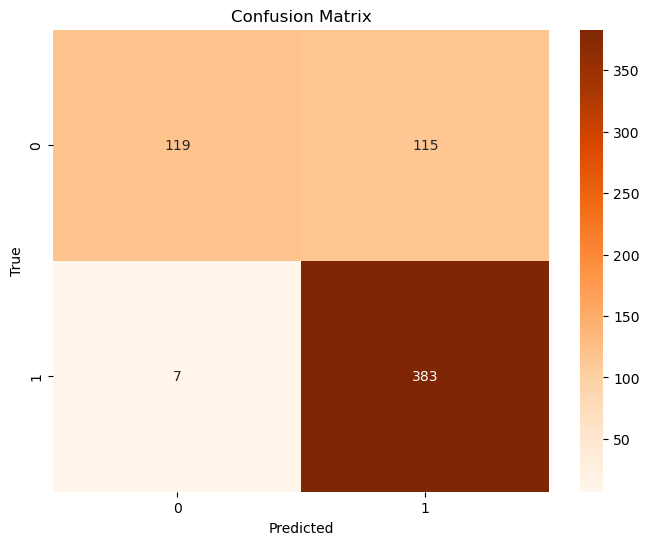

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming there are 'n' classes in your model
n_classes = 2

# Get the true labels for the validation data.
true_labels = []
for i in range(validation_iterator.samples // BATCH_SIZE):
    x_val, y_val = next(validation_iterator)
    true_labels.extend(np.argmax(y_val, axis=1))  # Assuming one-hot encoding

# Get the predicted labels from your model.
predicted_labels = model.predict(validation_iterator, steps=validation_iterator.samples // BATCH_SIZE)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Create the confusion matrix.
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=np.arange(n_classes), yticklabels=np.arange(n_classes))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()